# PF Generators (Equidistant points, NBI)

## Notebook for generating different Pareto-optimal data points for visualization

This notebook can be used to generate different Pareto-optimal data points for visualiation. The points generated in this notebook are computed from the subproblem decomposition weights used in Normal Boundary Intersection (NBI) method [[1]](#1). Currently this notebook implements following Pareto-optimal front (i.e. surface or point-clouds) through the `generators` module.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)

<a id="1">[1]</a> 
I. Das and J. E. Dennis, "Normal-Boundary Intersection: A New Method for Generating the Pareto Surface in Nonlinear Multicriteria Optimization Problems," SIAM Journal on Optimization, vol. 8, (3), pp. 631-27, 1998. [[pdf]](https://pdfs.semanticscholar.org/bd2d/4ce70e89e338bf06d5eac25dd366aae76225.pdf)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from viz.utils import transform as tr

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate Pareto-optimal front for DTLZ2

../data/dtlz2-nbi/2d f.csv x.csv dtlz2-nbi
F.shape: (500, 2)
X.shape: (500, 1)
F.shape: (500, 2)
X.shape: (500, 1)
[[1.         0.        ]
 [0.99999798 0.00200803]
 [0.9999919  0.00402411]]
[[1.        ]
 [0.99872165]
 [0.99743816]]


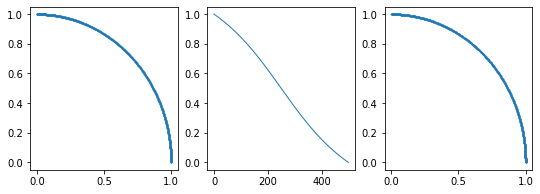

../data/dtlz2-nbi/3d f.csv x.csv dtlz2-nbi
F.shape: (990, 3)
X.shape: (990, 2)
F.shape: (990, 3)
X.shape: (990, 2)
[[1.         0.         0.        ]
 [0.99971667 0.02380278 0.        ]
 [0.99881235 0.04872255 0.        ]]
[[1.         1.        ]
 [1.         0.98484525]
 [1.         0.96896997]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 1000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 990 points instead.


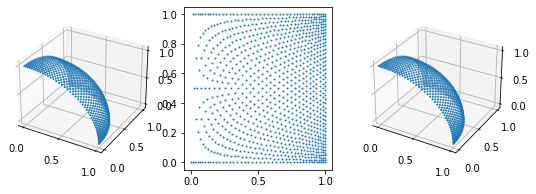

../data/dtlz2-nbi/4d f.csv x.csv dtlz2-nbi
F.shape: (1771, 4)
X.shape: (1771, 3)
F.shape: (1771, 4)
X.shape: (1771, 3)
[[1.         0.         0.         0.        ]
 [0.99861783 0.05255883 0.         0.        ]
 [0.99388373 0.11043153 0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.96652458]
 [1.         1.         0.92955343]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 2000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 1771 points instead.


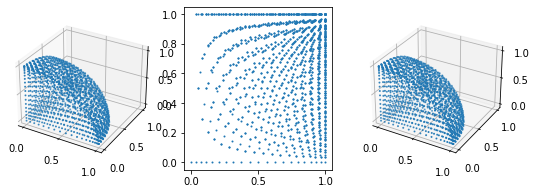

../data/dtlz2-nbi/8d f.csv x.csv dtlz2-nbi
F.shape: (3432, 8)
X.shape: (3432, 7)
F.shape: (3432, 8)
X.shape: (3432, 7)
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.98639392 0.16439899 0.         0.         0.         0.
  0.         0.        ]
 [0.92847669 0.37139068 0.         0.         0.         0.
  0.         0.        ]]
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  0.89486309]
 [1.         1.         1.         1.         1.         1.
  0.75776212]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 4000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 3432 points instead.


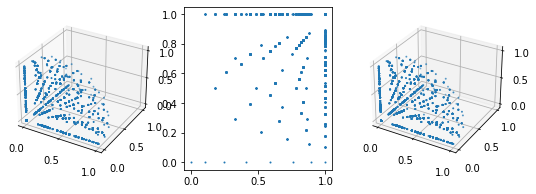

In [2]:
from viz.generators import dtlz2

dims = {"2d": 500, "3d": 1000, "4d": 2000, "8d": 4000}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/dtlz2-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    print(path, filenamef, filenamex, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X = dtlz2.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    
    # Just to make sure if we can get correct F from X
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")

### Generate Pareto-optimal front for DEBMDK

../data/debmdk-nbi/2d f.csv x.csv debmdk-nbi
F.shape: (1000, 2)
X.shape: (1000, 1)
F.shape: (596, 2)
X.shape: (596, 1)
[[9.5        0.        ]
 [9.49360429 0.00951263]
 [9.48716214 0.01903142]]
[[1.        ]
 [0.9993621 ]
 [0.99872293]]


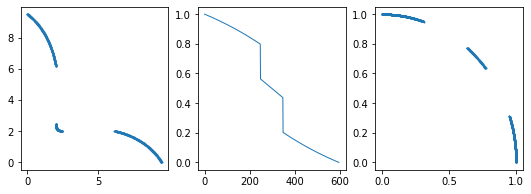

../data/debmdk-nbi/3d f.csv x.csv debmdk-nbi
F.shape: (1485, 3)
X.shape: (1485, 2)
F.shape: (1143, 3)
X.shape: (1143, 2)
[[9.5        0.         0.        ]
 [9.4348425  0.18143928 0.        ]
 [9.35889089 0.36701533 0.        ]]
[[1.         1.        ]
 [1.         0.98775882]
 [1.         0.9750473 ]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 1500 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 1485 points instead.


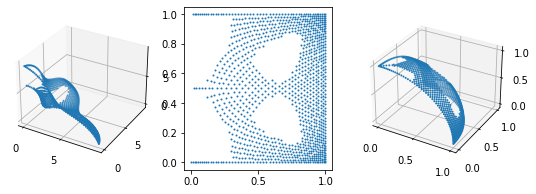

../data/debmdk-nbi/4d f.csv x.csv debmdk-nbi
F.shape: (2300, 4)
X.shape: (2300, 3)
F.shape: (2028, 4)
X.shape: (2028, 3)
[[9.5        0.         0.         0.        ]
 [9.37941697 0.4466389  0.         0.        ]
 [9.20373003 0.920373   0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.96970766]
 [1.         1.         0.93654897]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 2500 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 2300 points instead.


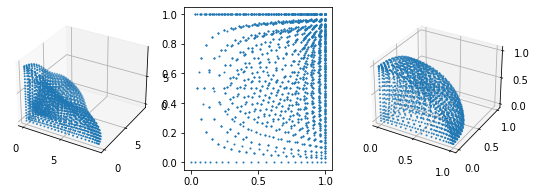

../data/debmdk-nbi/8d f.csv x.csv debmdk-nbi
F.shape: (3432, 8)
X.shape: (3432, 7)


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 4100 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 3432 points instead.


F.shape: (3432, 8)
X.shape: (3432, 7)
[[9.5        0.         0.         0.         0.         0.
  0.         0.        ]
 [9.17887788 1.52981298 0.         0.         0.         0.
  0.         0.        ]
 [8.32471088 3.32988435 0.         0.         0.         0.
  0.         0.        ]]
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  0.89486309]
 [1.         1.         1.         1.         1.         1.
  0.75776212]]


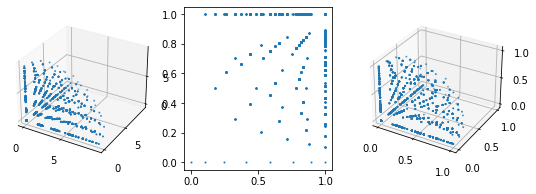

In [3]:
from viz.generators import debmdk

dims = {"2d": 1000, "3d": 1500, "4d": 2500, "8d": 4100}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/debmdk-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    print(path, filenamef, filenamex, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X = debmdk.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    
    # Just to make sure if we can get correct F from X
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")

### Generate all points for DEBMDK

../data/debmdk-all-nbi/2d f.csv x.csv debmdk-all-nbi
F.shape: (500, 2)
X.shape: (500, 1)
[[9.5        0.        ]
 [9.48714919 0.0190505 ]
 [9.47411146 0.0381252 ]]
[[1.        ]
 [0.99872165]
 [0.99743816]]


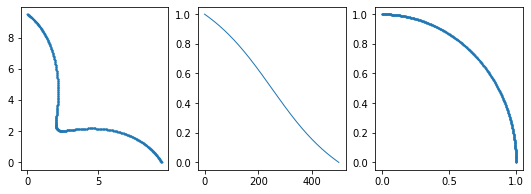

../data/debmdk-all-nbi/3d f.csv x.csv debmdk-all-nbi
F.shape: (990, 3)
X.shape: (990, 2)
[[9.5        0.         0.        ]
 [9.4181754  0.22424227 0.        ]
 [9.31963655 0.45461642 0.        ]]
[[1.         1.        ]
 [1.         0.98484525]
 [1.         0.96896997]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 1000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 990 points instead.


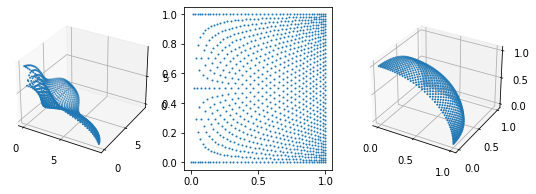

../data/debmdk-all-nbi/4d f.csv x.csv debmdk-all-nbi
F.shape: (1771, 4)
X.shape: (1771, 3)
[[9.5        0.         0.         0.        ]
 [9.36449711 0.49286827 0.         0.        ]
 [9.1610965  1.01789961 0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.96652458]
 [1.         1.         0.92955343]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 2000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 1771 points instead.


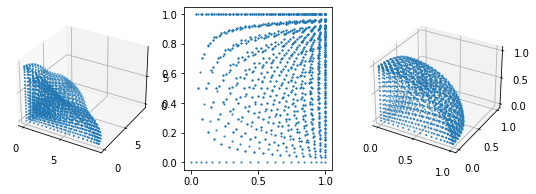

../data/debmdk-all-nbi/8d f.csv x.csv debmdk-all-nbi
F.shape: (3432, 8)
X.shape: (3432, 7)
[[9.5        0.         0.         0.         0.         0.
  0.         0.        ]
 [9.17887788 1.52981298 0.         0.         0.         0.
  0.         0.        ]
 [8.32471088 3.32988435 0.         0.         0.         0.
  0.         0.        ]]
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  0.89486309]
 [1.         1.         1.         1.         1.         1.
  0.75776212]]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 4000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 3432 points instead.


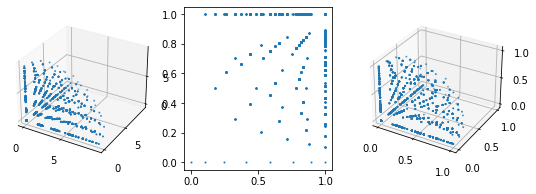

In [4]:
from viz.generators import debmdk

dims = {"2d": 500, "3d": 1000, "4d": 2000, "8d": 4000}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/debmdk-all-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    print(path, filenamef, filenamex, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X = debmdk.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    
    # Just to make sure if we can get correct F from X
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")

### Generate Pareto-optimal front for CDEBMDK

../data/cdebmdk-nbi/2d f.csv x.csv g.csv cv.csv cdebmdk-nbi
F.shape: (540, 2)
X.shape: (540, 1)
G.shape: (540,)
CV.shape: (540,)
F.shape: (511, 2)
X.shape: (511, 1)
G.shape: (511,)
CV.shape: (511,)
[[2.24733059 2.05022864]
 [2.24636165 2.05051869]
 [2.24539508 2.05081054]]
[[0.52917729]
 [0.52899575]
 [0.52881421]]
[-0.0001851  -0.00117672 -0.00216412]
[1.         0.99289972 0.98582963]


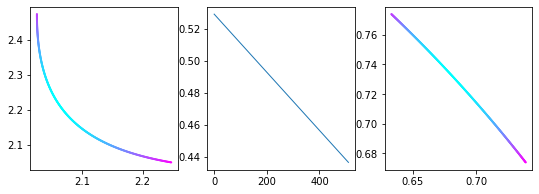

../data/cdebmdk-nbi/3d f.csv x.csv g.csv cv.csv cdebmdk-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 18000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 17955 points instead.


F.shape: (2207, 3)
X.shape: (2207, 2)
G.shape: (2207,)
CV.shape: (2207,)
F.shape: (1049, 3)
X.shape: (1049, 2)
G.shape: (1049,)
CV.shape: (1049,)
[[2.8696011  2.64003301 1.68349931]
 [2.82542206 2.67269654 1.67998068]
 [2.78372549 2.70745904 1.67786194]]
[[0.74053235 0.52651049]
 [0.74042075 0.51767934]
 [0.74035372 0.50884137]]
[-0.03086181 -0.06568225 -0.08648326]
[0.98647659 0.97082897 0.96148141]


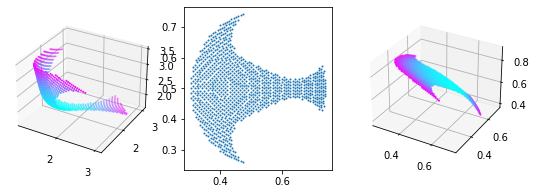

../data/cdebmdk-nbi/4d f.csv x.csv g.csv cv.csv cdebmdk-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 80000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 79079 points instead.


F.shape: (4851, 4)
X.shape: (4851, 3)
G.shape: (4851,)
CV.shape: (4851,)
F.shape: (2042, 4)
X.shape: (2042, 3)
G.shape: (2042,)
CV.shape: (2042,)
[[2.47464319 2.24967563 2.58712697 1.23732159]
 [2.35473233 2.35473233 2.57899255 1.23343122]
 [2.24967563 2.47464319 2.58712697 1.23732159]]
[[0.81876492 0.58083785 0.53029234]
 [0.81864335 0.58048887 0.5       ]
 [0.81876492 0.58083785 0.46970766]]
[-0.03022092 -0.08042753 -0.03022092]
[0.986619   0.96385404 0.986619  ]


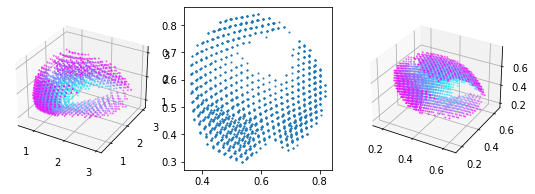

../data/cdebmdk-nbi/8d f.csv x.csv g.csv cv.csv cdebmdk-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 3000000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 2629575 points instead.


F.shape: (3443, 8)
X.shape: (3443, 7)
G.shape: (3443,)
CV.shape: (3443,)
F.shape: (3380, 8)
X.shape: (3380, 7)
G.shape: (3380,)
CV.shape: (3380,)
[[1.73747212 1.73747212 2.3166295  2.3166295  1.73747212 1.73747212
  1.73747212 0.57915737]
 [1.71918733 1.71918733 2.29224978 1.71918733 2.29224978 1.71918733
  1.71918733 0.57306244]
 [1.67704523 1.67704523 1.67704523 2.23606031 2.23606031 1.67704523
  1.67704523 0.55901508]]
[[0.92776209 0.77787155 0.76295597 0.74455814 0.61722331 0.51873493
  0.5       ]
 [0.92776209 0.77787155 0.76295597 0.65130053 0.69749302 0.51873493
  0.5       ]
 [0.92776209 0.77787155 0.76295597 0.65130053 0.58234345 0.60817345
  0.5       ]]
[-0.10661499 -0.13814495 -0.18874423]
[0.96181049 0.95051338 0.93238377]


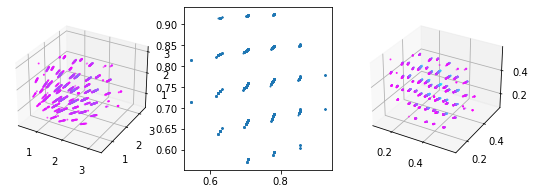

In [5]:
from viz.generators import cdebmdk

dims = {"2d": 7000, "3d": 18000, "4d": 80000, "8d": 3000000}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/cdebmdk-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    filenameg = 'g.csv'
    fullpathg = os.path.join(path, filenameg)
    filenamecv = 'cv.csv'
    fullpathcv = os.path.join(path, filenamecv)
    print(path, filenamef, filenamex, filenameg, filenamecv, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X, G, CV = cdebmdk.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    G = G[Ip]
    CV = CV[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    print(G[0:3])
    print(CV[0:3])
    
    # Just to make sure if we can get correct F from X. Here we 
    # don't apply the exact function as F, just map them on a sphere
    # for the sanity check.
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_
    
    color = [cm.cool(v * 1.0) for v in CV]

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1, c=color)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1, c=color)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathg, G, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathcv, CV, delimiter=',', fmt="%1.4e")

### Generate Pareto-optimal front for C0-DTLZ2

../data/c0dtlz2-nbi/2d f.csv x.csv g.csv cv.csv c0dtlz2-nbi
F.shape: (525, 2)
X.shape: (525, 1)
G.shape: (525,)
CV.shape: (525,)
F.shape: (525, 2)
X.shape: (525, 1)
G.shape: (525,)
CV.shape: (525,)
[[1.         0.        ]
 [0.99999911 0.0013369 ]
 [0.99999642 0.00267737]]
[[1.        ]
 [0.9991489 ]
 [0.99829553]]
[-0.735      -0.73268896 -0.73037532]
[0.         0.00314443 0.00629238]


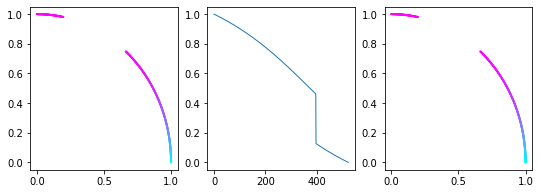

../data/c0dtlz2-nbi/3d f.csv x.csv g.csv cv.csv c0dtlz2-nbi
F.shape: (983, 3)
X.shape: (983, 2)
G.shape: (983,)
CV.shape: (983,)
F.shape: (983, 3)
X.shape: (983, 2)
G.shape: (983,)
CV.shape: (983,)
[[1.         0.         0.        ]
 [0.99978306 0.02082881 0.        ]
 [0.99909584 0.04251472 0.        ]]
[[1.         1.        ]
 [1.         0.98673901]
 [1.         0.97292613]]
[-0.735 -0.735 -0.735]
[0. 0. 0.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 1300 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 1275 points instead.


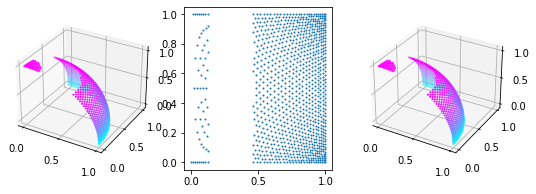

../data/c0dtlz2-nbi/4d f.csv x.csv g.csv cv.csv c0dtlz2-nbi
F.shape: (1916, 4)
X.shape: (1916, 3)
G.shape: (1916,)
CV.shape: (1916,)
F.shape: (1916, 4)
X.shape: (1916, 3)
G.shape: (1916,)
CV.shape: (1916,)
[[1.         0.         0.         0.        ]
 [0.99886814 0.04756515 0.         0.        ]
 [0.99503719 0.09950372 0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.96970766]
 [1.         1.         0.93654897]]
[-0.735 -0.735 -0.735]
[0. 0. 0.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 2500 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 2300 points instead.


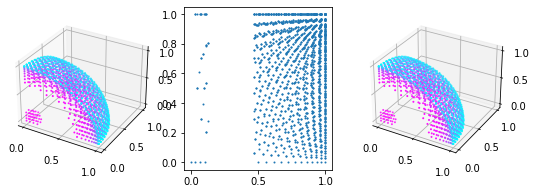

../data/c0dtlz2-nbi/8d f.csv x.csv g.csv cv.csv c0dtlz2-nbi
F.shape: (3180, 8)
X.shape: (3180, 7)
G.shape: (3180,)
CV.shape: (3180,)
F.shape: (3180, 8)
X.shape: (3180, 7)
G.shape: (3180,)
CV.shape: (3180,)
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.98639392 0.16439899 0.         0.         0.         0.
  0.         0.        ]
 [0.92847669 0.37139068 0.         0.         0.         0.
  0.         0.        ]]
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  0.89486309]
 [1.         1.         1.         1.         1.         1.
  0.75776212]]
[-0.735 -0.735 -0.735]
[0. 0. 0.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 6000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 3432 points instead.


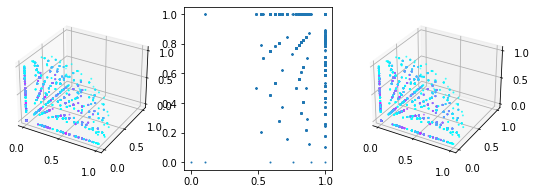

In [6]:
from viz.generators import c0dtlz2

dims = {"2d": 750, "3d": 1300, "4d": 2500, "8d": 6000}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/c0dtlz2-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    filenameg = 'g.csv'
    fullpathg = os.path.join(path, filenameg)
    filenamecv = 'cv.csv'
    fullpathcv = os.path.join(path, filenamecv)
    print(path, filenamef, filenamex, filenameg, filenamecv, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X, G, CV = c0dtlz2.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    G = G[Ip]
    CV = CV[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    print(G[0:3])
    print(CV[0:3])
    
    # Just to make sure if we can get correct F from X.
    F_ = np.zeros(F.shape)
    for i in range(m):
        F_[:,i] = np.prod(np.sin(X[:,0:m - (i + 1)] * (np.pi / 2)), axis=1)
        if i > 0:
            F_[:,i] = F_[:,i] * np.cos(X[:,m - (i + 1)] * (np.pi / 2))
    F_ = r * F_
    
    color = [cm.cool(v * 1.0) for v in CV]

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize = (9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1, c=color)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1, c=color)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathg, G, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathcv, CV, delimiter=',', fmt="%1.4e")

### Generate Pareto-optimal front for C2-DTLZ2

../data/c2dtlz2-nbi/2d f.csv x.csv g.csv cv.csv c2dtlz2-nbi
F.shape: (534, 2)
X.shape: (534, 1)
G.shape: (534,)
CV.shape: (534,)
F.shape: (534, 2)
X.shape: (534, 1)
G.shape: (534,)
CV.shape: (534,)
[[1.         0.        ]
 [0.9999995  0.001002  ]
 [0.99999799 0.00200601]]
[[1.        ]
 [0.9993621 ]
 [0.99872293]]
[-0.0625     -0.062499   -0.06249598]
[0.00000000e+00 1.61028728e-05 6.45406205e-05]


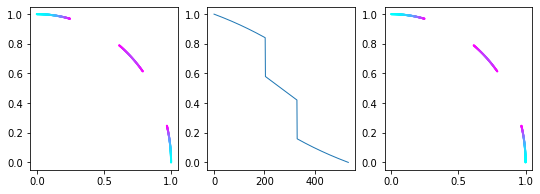

../data/c2dtlz2-nbi/3d f.csv x.csv g.csv cv.csv c2dtlz2-nbi
F.shape: (1036, 3)
X.shape: (1036, 2)
G.shape: (1036,)
CV.shape: (1036,)
F.shape: (1036, 3)
X.shape: (1036, 2)
G.shape: (1036,)
CV.shape: (1036,)
[[1.         0.         0.        ]
 [0.99989189 0.01470429 0.        ]
 [0.99955476 0.02983746 0.        ]]
[[1.         1.        ]
 [1.         0.99063862]
 [1.         0.98100207]]
[-0.16       -0.15978377 -0.15910953]
[0.         0.00136889 0.00563737]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 2500 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 2485 points instead.


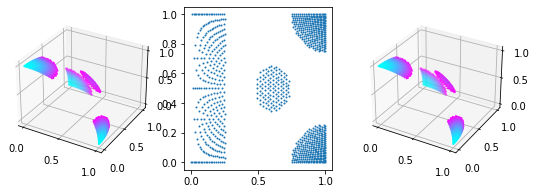

../data/c2dtlz2-nbi/4d f.csv x.csv g.csv cv.csv c2dtlz2-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 5000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 4960 points instead.


F.shape: (1984, 4)
X.shape: (1984, 3)
G.shape: (1984,)
CV.shape: (1984,)
F.shape: (1984, 4)
X.shape: (1984, 3)
G.shape: (1984,)
CV.shape: (1984,)
[[1.         0.         0.         0.        ]
 [0.99936285 0.03569153 0.         0.        ]
 [0.99726775 0.07387169 0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.97727324]
 [1.         1.         0.95292895]]
[-0.25       -0.24872571 -0.24453551]
[0.         0.00515112 0.02208935]


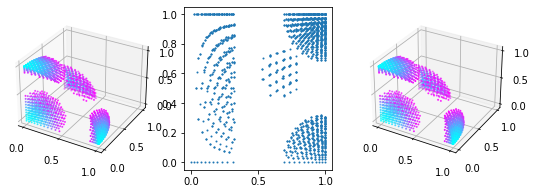

../data/c2dtlz2-nbi/5d f.csv x.csv g.csv cv.csv c2dtlz2-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 7500 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 7315 points instead.


F.shape: (2280, 5)
X.shape: (2280, 4)
G.shape: (2280,)
CV.shape: (2280,)
F.shape: (2280, 5)
X.shape: (2280, 4)
G.shape: (2280,)
CV.shape: (2280,)
[[1.         0.         0.         0.         0.        ]
 [0.99827437 0.05872202 0.         0.         0.        ]
 [0.99227788 0.12403473 0.         0.         0.        ]]
[[1.         1.         1.         1.        ]
 [1.         1.         1.         0.96259488]
 [1.         1.         1.         0.92083315]]
[-0.25       -0.24654875 -0.23455575]
[0.         0.01381751 0.06183289]


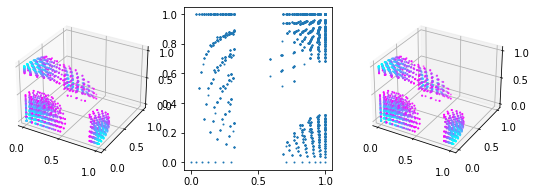

../data/c2dtlz2-nbi/8d f.csv x.csv g.csv cv.csv c2dtlz2-nbi


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:205: UserWarning: Das-Dennis's method couldn't generate 20000 points.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:206: UserWarning: Genenrated 19448 points instead.


F.shape: (3872, 8)
X.shape: (3872, 7)
G.shape: (3872,)
CV.shape: (3872,)
F.shape: (3872, 8)
X.shape: (3872, 7)
G.shape: (3872,)
CV.shape: (3872,)
[[1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.99388373 0.11043153 0.         0.         0.         0.
  0.         0.        ]
 [0.9701425  0.24253563 0.         0.         0.         0.
  0.         0.        ]]
[[1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         1.         1.         1.         1.         1.
  0.92955343]
 [1.         1.         1.         1.         1.         1.
  0.84404174]]
[-0.25       -0.23776747 -0.190285  ]
[0.         0.05267351 0.25713395]


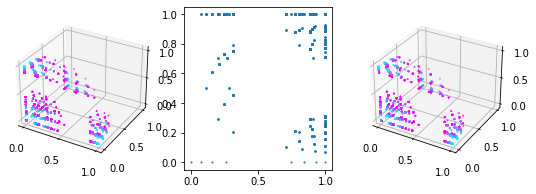

In [7]:
from viz.generators import c2dtlz2

dims = {"2d": 1000, "3d": 2500, "4d": 5000, "5d": 7500, "8d": 20000}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/c2dtlz2-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    filenameg = 'g.csv'
    fullpathg = os.path.join(path, filenameg)
    filenamecv = 'cv.csv'
    fullpathcv = os.path.join(path, filenamecv)
    print(path, filenamef, filenamex, filenameg, filenamecv, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X, G, CV = c2dtlz2.surface(r=r, n=n, m=m, mode='dd') # das-dennis
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    G = G[Ip]
    CV = CV[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    print(G[0:3])
    print(CV[0:3])
    
    # Just to make sure if we can get correct F from X.
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_
    
    color = [cm.cool(v * 1.0) for v in CV]

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1, c=color)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1, c=color)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathg, G, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathcv, CV, delimiter=',', fmt="%1.4e")

### Generate Pareto-optimal front for DTLZ8

../data/dtlz8-nbi/2d f.csv x.csv g.csv cv.csv dtlz8-nbi
F.shape: (550, 2)
X.shape: (550, 1)
G.shape: (550, 2)
CV.shape: (550,)
F.shape: (550, 2)
X.shape: (550, 1)
G.shape: (550, 2)
CV.shape: (550,)
[[0.         1.        ]
 [0.00666667 0.98666667]
 [0.01333333 0.97333333]]
[[0.        ]
 [0.00666667]
 [0.01333333]]
[[1.  0.5]
 [1.  0.5]
 [1.  0.5]]
[1. 1. 1.]


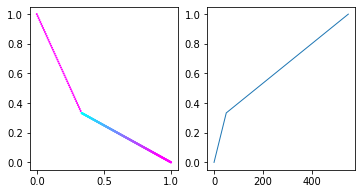

../data/dtlz8-nbi/3d f.csv x.csv g.csv cv.csv dtlz8-nbi
F.shape: (1025, 3)
X.shape: (1025, 2)
G.shape: (1025, 3)
CV.shape: (1025,)
F.shape: (1025, 3)
X.shape: (1025, 2)
G.shape: (1025, 3)
CV.shape: (1025,)
[[0.     0.     1.    ]
 [0.0025 0.0025 0.9925]
 [0.005  0.005  0.985 ]]
[[0.     0.    ]
 [0.0025 0.0025]
 [0.005  0.005 ]]
[[2.  2.  0.5]
 [2.  2.  0.5]
 [2.  2.  0.5]]
[1. 1. 1.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:51: UserWarning: Not possible to generate 11000 points in grid.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:52: UserWarning: Genenrated 11025 points instead.


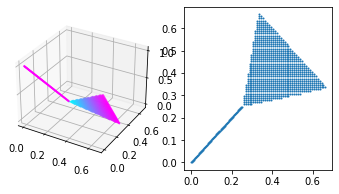

../data/dtlz8-nbi/4d f.csv x.csv g.csv cv.csv dtlz8-nbi
F.shape: (2153, 4)
X.shape: (2153, 3)
G.shape: (2153, 4)
CV.shape: (2153,)
F.shape: (2088, 4)
X.shape: (2088, 3)
G.shape: (2088, 4)
CV.shape: (2088,)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [6.25000e-04 6.25000e-04 6.25000e-04 9.98125e-01]
 [1.25000e-03 1.25000e-03 1.25000e-03 9.96250e-01]]
[[0.       0.       0.      ]
 [0.000625 0.000625 0.000625]
 [0.00125  0.00125  0.00125 ]]
[[3.   3.   3.   0.65]
 [3.   3.   3.   0.65]
 [3.   3.   3.   0.65]]
[1. 1. 1.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:51: UserWarning: Not possible to generate 80000 points in grid.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:52: UserWarning: Genenrated 85184 points instead.


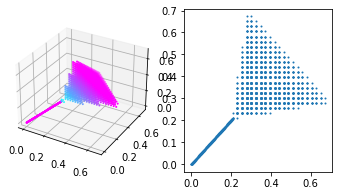

../data/dtlz8-nbi/6d f.csv x.csv g.csv cv.csv dtlz8-nbi
F.shape: (3784, 6)
X.shape: (3784, 5)
G.shape: (3784, 6)
CV.shape: (3784,)


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:51: UserWarning: Not possible to generate 320000 points in grid.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:52: UserWarning: Genenrated 371293 points instead.


F.shape: (3535, 6)
X.shape: (3535, 5)
G.shape: (3535, 6)
CV.shape: (3535,)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.76190476e-04 4.76190476e-04 4.76190476e-04 4.76190476e-04
  4.76190476e-04 9.98809524e-01]
 [9.52380952e-04 9.52380952e-04 9.52380952e-04 9.52380952e-04
  9.52380952e-04 9.97619048e-01]]
[[0.         0.         0.         0.         0.        ]
 [0.00047619 0.00047619 0.00047619 0.00047619 0.00047619]
 [0.00095238 0.00095238 0.00095238 0.00095238 0.00095238]]
[[5.  5.  5.  5.  5.  1.2]
 [5.  5.  5.  5.  5.  1.2]
 [5.  5.  5.  5.  5.  1.2]]
[1. 1. 1.]


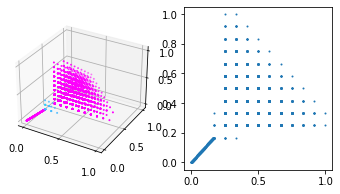

../data/dtlz8-nbi/8d f.csv x.csv g.csv cv.csv dtlz8-nbi
F.shape: (2516, 8)
X.shape: (2516, 7)
G.shape: (2516, 8)
CV.shape: (2516,)
F.shape: (2277, 8)
X.shape: (2277, 7)
G.shape: (2277, 8)
CV.shape: (2277,)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.57142857e-04 3.57142857e-04 3.57142857e-04 3.57142857e-04
  3.57142857e-04 3.57142857e-04 3.57142857e-04 9.99107143e-01]
 [7.14285714e-04 7.14285714e-04 7.14285714e-04 7.14285714e-04
  7.14285714e-04 7.14285714e-04 7.14285714e-04 9.98214286e-01]]
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.00035714 0.00035714 0.00035714 0.00035714 0.00035714 0.00035714
  0.00035714]
 [0.00071429 0.00071429 0.00071429 0.00071429 0.00071429 0.00071429
  0.00071429]]
[[7. 7. 7. 7. 7. 7. 7. 2.]
 [7. 7. 7. 7. 7. 7. 7. 2.]
 [7. 7. 7. 7. 7. 7. 7. 2.]]
[1. 1. 1.]


/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:51: UserWarning: Not possible to generate 160000 points in grid.
/Users/khaled/.local/share/virtualenvs/pviz-bench-ikdOn699/lib/python3.8/site-packages/pviz-0.1.0rc5-py3.8.egg/viz/utils/sampling.py:52: UserWarning: Genenrated 279936 points instead.


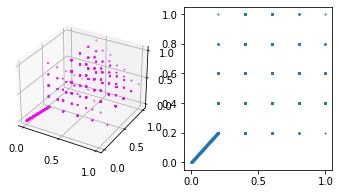

In [8]:
from viz.generators import dtlz8

# These factors need to be multiplied so that constraint violations
# are better visible when plotted with color.
cc = {2: 2.0, 3: 6.0, 4: 8.0, 6: 14.0, 8: 16.0}

dims = {'2d': [2, 50, 750], '3d': [3, 100, 11000], '4d': [4, 400, 80000], \
        '6d': [6, 600, 320000], '8d': [8, 800, 160000]}

for dim in list(dims.keys()):
    # Open all files
    fullpathf = "../data/dtlz8-nbi/{0:s}/f.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    filenameg = 'g.csv'
    fullpathg = os.path.join(path, filenameg)
    filenamecv = 'cv.csv'
    fullpathcv = os.path.join(path, filenamecv)
    print(path, filenamef, filenamex, filenameg, filenamecv, frontname)

    np.random.seed(123456)
    m, nl, ns = dims[dim][0], dims[dim][1], dims[dim][2]
    F, X, G, CV = dtlz8.surface(m=m, nl=nl, ns=ns, mode='grid') # grid
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    G = G[Ip]
    CV = CV[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    print("G.shape:", G.shape)
    print("CV.shape:", CV.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    print(G[0:3])
    print(CV[0:3])
    
    color = [cm.cool(v * cc[m]) for v in CV]

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1, c=color)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathg, G, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathcv, CV, delimiter=',', fmt="%1.4e")